In [1]:
import sympy
import numpy as np
from einsteinpy.symbolic import MetricTensor
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

#import inflatox
import inflatox

In [2]:
sympy.init_printing()
φ, χ = sympy.symbols("φ χ")
coords = [φ, χ]

M, mh, ml, φ0 = sympy.symbols("M m_h m_l φ_0")
metric = [[0 for _ in range(2)] for _ in range(2)]
metric[0][0] = (1 + 2*χ**2/M**2).nsimplify()
metric[1][1] = 1
metric = MetricTensor(metric, coords)
V = ((1/2)*(χ*mh)**2 + (1/2)*ml**2*(φ-φ0)**2).nsimplify()
display(metric.tensor())
display(V)

⎡       2   ⎤
⎢    2⋅χ    ⎥
⎢1 + ────  0⎥
⎢      2    ⎥
⎢     M     ⎥
⎢           ⎥
⎣   0      1⎦

In [3]:
hesse = inflatox.SymbolicCalculation.new(
  coords,
  metric,
  V,
  simplification_depth=0
).execute([[0,1]])

Calculating orthonormal basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculating covariant Hesse matrix...


<IPython.core.display.Math object>

Projecting the Hesse matrix on the vielbein basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
out = inflatox.Compiler(hesse, cleanup=False).compile()
out.print_sym_lookup_table()

[Symbol Dictionary]
φ -> x[0]
χ -> x[1]
m_h -> args[0]
m_l -> args[1]
φ_0 -> args[2]
M -> args[3]


In [5]:
from inflatox.consistency_conditions import AnguelovaLazaroiuCondition
anguelova = AnguelovaLazaroiuCondition(out)

args = np.array([1.0, 1.0, 1.0, 1.0])
x = np.array([1.0, 1.0])

V, H = anguelova.calc_V(x, args), anguelova.calc_H(x, args)
print(H, V)
print(3*V*H[0][0]**2)
print(H[0][1]**2*H[1][1])

[[ 1. nan]
 [nan nan]] 0.5
1.5
nan


In [9]:
extent = (-5.0, 5.0, -10.0, 10.0)
N = 20_000
array = anguelova.evaluate(args, *extent, N_x0=N, N_x1=N)

In [10]:
print(np.nanmin(array))
print(np.nanmax(array))

-0.5517539174417405
inf


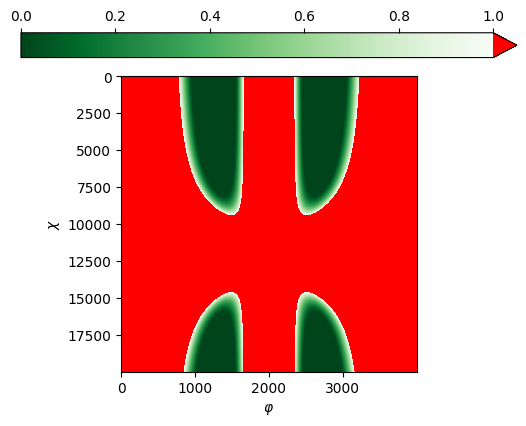

In [21]:
import matplotlib as mpl

cmap = mpl.colormaps['Greens'].copy().reversed()
cmap.set_over('red')
cmap.set_bad('red')

plt.imshow(
  array[:, 8000:12000],
  #extent=extent,
  cmap=cmap,
  norm=plt.Normalize(vmin=0.0, vmax=1.0),
  aspect=0.2
)
plt.colorbar(extend='max', location='top')

plt.xlabel(f'${sympy.latex(coords[0])}$')
plt.ylabel(f'${sympy.latex(coords[1])}$')
plt.show()